In [1]:
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

from utils import (
    DATASETS,
    load_data,
    encode_token,
    write_data,
    remove_features_in_test_and_not_in_training,
    decode_enc_tokens,
)

In [2]:
DATASETS

['ES', 'RU']

In [3]:
def visualiseData(dataset, n = 10):
    feat_train, label_train = load_data(path=f"{dataset}/train")
    feat_in, _ = load_data(path=f"{dataset}/dev.in")

    feat_train_encoded, feat_map = encode_token(tokens=feat_train)
    label_train_encoded, label_map = encode_token(tokens=label_train)
    
    feat_in_cleaned = remove_features_in_test_and_not_in_training(
            features_test=feat_in, features_training=feat_train
        )
    feat_in_encoded, _ = encode_token(tokens=feat_in_cleaned, token_map=feat_map)
    
    print(f'Reading the {dataset} dataset....')
    
    print('\n----------Summary Statistics----------')
    print('Number of train data points:', len(feat_train))
    print('Number of dev.in data points:', len(feat_in))
    
    print(f'\nOverview of the first {n} datapoints')

    print('\n----------Train Data----------')
    for i,j in zip(feat_train[:n], label_train[:n]):
        print(i)
        print(j, '\n')
        
    print('----------dev.in Data----------')
    for i in feat_in[:n]:
        print(i)
    
    print('\n----------dev.in Label Map----------')
    print(label_map)
    
    print('\n----------Train Data Feature Map----------')
    print(list(feat_map)[:n])
    
    print('\n----------Encoded Train Data----------')
    for i in feat_train_encoded[:n]:
        print(i)
        
    print('\n----------Cleaned Data----------')
    for i in feat_in_cleaned[:n]:
        print(i)
        
    print('\n----------Number of Labels in the Entire Dataset----------')
    # Count labels
    print()
    label_count_dict = {}
    for i in label_train:
        for j in i:
            if j not in label_count_dict:
                label_count_dict[j] = 0
            else:
                label_count_dict[j] += 1
    print(label_count_dict)
    
    del label_count_dict['O']
    plt.bar(label_count_dict.keys(), label_count_dict.values())
    plt.xticks(rotation=90)

## ES Dataset

Reading the ES dataset....

----------Summary Statistics----------
Number of train data points: 2065
Number of dev.in data points: 294

Overview of the first 10 datapoints

----------Train Data----------
['disfrutemos', 'de', 'una', 'buenísima', 'calidad', 'en', 'el', 'producto', 'y', 'una', 'inmejorable', 'relación', 'calidad', 'precio', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 

['Hoy', 'he', 'ido', 'a', 'comer', 'con', 'mia', 'padres', 'y', 'he', 'salido', 'muy', 'defraudado', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 

['A', 'mejorar', 'baños', '.']
['O', 'O', 'B-negative', 'O'] 

['En', 'el', 'apartado', 'de', 'ambiente', 'todo', 'muy', 'correcto', ',', 'decoración', ',', 'música', ',', 'ambiente', ',', 'etc', '.']
['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 

['La', 'excusa', 'del', 'restaurante', 'ha', 'sido', 'que', 'el', 'dia', '1', 'de', 'enero

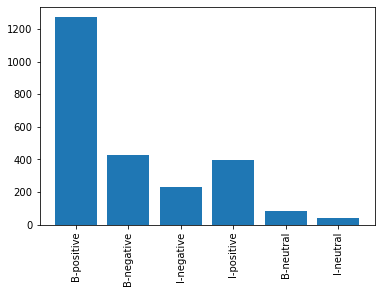

In [4]:
visualiseData(DATASETS[0])

In [5]:
feat_train_ES, label_train_ES = load_data(path=f"{DATASETS[0]}/train")
feat_in_ES, _ES = load_data(path=f"{DATASETS[0]}/dev.in")

feat_train_encoded_ES, feat_map_ES = encode_token(tokens=feat_train_ES)
label_train_encoded_ES, label_map_ES = encode_token(tokens=label_train_ES)

feat_in_cleaned_ES = remove_features_in_test_and_not_in_training(
        features_test=feat_in_ES, features_training=feat_train_ES
    )
feat_in_encoded_ES, _ES = encode_token(tokens=feat_in_cleaned_ES, token_map=feat_map_ES)

In [6]:
n = 2

print(feat_in_encoded_ES[:n])
print(feat_in_cleaned_ES[:n])
print()
print(label_train_encoded_ES[:n])
print(label_train_ES[:n])

[[4092, 1465, 1765, 5095, 4696, 4282], [1550, 2520, 4282]]
[['La', 'comida', 'estuvo', 'muy', 'sabrosa', '.'], ['Servicio', 'esmerado', '.']]

[[7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]]
[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


## RU Dataset

Reading the RU dataset....

----------Summary Statistics----------
Number of train data points: 3404
Number of dev.in data points: 486

Overview of the first 10 datapoints

----------Train Data----------
['А', 'жаль', '...', 'новое', 'место', 'в', 'центре', 'города', '!', '!']
['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O'] 

['В', '-', 'третьих', ',', 'обслуживание', 'и', 'отношение', 'персонала', 'очень', 'радушное', '.']
['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'B-positive', 'O', 'O', 'O'] 

['Н', 'Начну', 'из', 'далека', ')', ')', 'года', '1,5-', '2', 'назад', 'заходила', 'в', '"', 'дали', '"', 'и', 'осталась', 'с', 'неоднозначными', 'впечатлениями', '(', 'то', 'ли', 'понравилось', ',', 'то', 'ли', 'нет', ')', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] 

['В', 'общем', 'мне', 'очень', 'понравился', 'ресторан', '!']
['O', 'O', 'O', 'O', 'O', 'B-positive', 

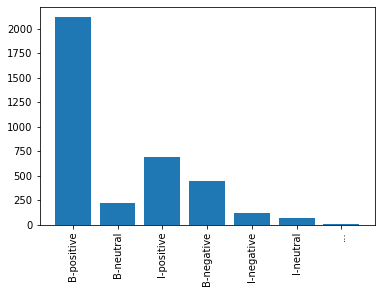

In [7]:
visualiseData(DATASETS[1])

In [8]:
feat_train_RU, label_train_RU = load_data(path=f"{DATASETS[1]}/train")
feat_in_RU, _RU = load_data(path=f"{DATASETS[1]}/dev.in")

feat_train_encoded_RU, feat_map_RU = encode_token(tokens=feat_train_RU)
label_train_encoded_RU, label_map_RU = encode_token(tokens=label_train_RU)

feat_in_cleaned_RU = remove_features_in_test_and_not_in_training(
        features_test=feat_in_RU, features_training=feat_train_RU
    )
feat_in_encoded_RU, _RU = encode_token(tokens=feat_in_cleaned_RU, token_map=feat_map_RU)

In [9]:
n = 2

print(feat_in_encoded_RU[:n])
print(feat_in_cleaned_RU[:n])
print()
print(label_train_encoded_RU[:n])
print(label_train_RU[:n])

[[3728, 6432, 2110, 3580, 5565, 242, 8119, 1577, 4702, 5001, 3008, 469, 434, 5765, 3008, 3803, 4688, 3520, 1584, 29, 757, 3008, 6702], [3008, 3008, 4733, 4009, 5539, 6702]]
[['И', 'что', 'очень', 'приятно', '-', 'к', 'шашлыку', 'приносят', 'тарелку', 'с', '#UNK#', 'и', 'лимоном', 'для', '#UNK#', 'рук', ':', 'я', 'шашлык', 'люблю', 'есть', '#UNK#', '.'], ['#UNK#', '#UNK#', 'пиво', '–', 'понравилось', '.']]

[[7, 7, 7, 7, 5, 7, 7, 7, 7, 7], [7, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7]]
[['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'B-positive', 'O', 'O', 'B-positive', 'O', 'O', 'O']]
